In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv('D:\\bicycle_data\\2019{}-citibike-tripdata.csv'.format(str("01").zfill(2)),usecols=[1,2,4,5,6,9,10])
raw_data2 = pd.DataFrame(df2)
raw_data2.dropna(inplace=True)
raw_data2=raw_data2[(raw_data2['start station name']!='Division Ave & Hooper St') &( raw_data2['start station name']!='Cliff St & Fulton St (Old)')&( raw_data2['start station name']!='Division St & Bowery (old)')]
raw_data2=raw_data2[(raw_data2['start station name']!='Lafayette St & Jersey St S') &( raw_data2['start station name']!='W Broadway & Spring St')&( raw_data2['start station name']!='Broadway & W 36 St')]
raw_data2=raw_data2[(raw_data2['start station name']!='Pershing Square South') &( raw_data2['start station name']!='W 45 St & 6 Ave -')&( raw_data2['start station name']!='E 58 St & 1 Ave')]
raw_data2

,starttime,stoptime,start station name,start station latitude,start station longitude,end station latitude,end station longitude
0,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,Central Park West & W 76 St,40.778968,-73.973747,40.788221,-73.970416
1,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,Pershing Square North,40.751873,-73.977706,40.747804,-73.973442
2,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,Amsterdam Ave & W 82 St,40.785247,-73.976673,40.773142,-73.958562
3,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,1 Ave & E 16 St,40.732219,-73.981656,40.738046,-73.996430
4,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,Great Jones St,40.727434,-73.993790,40.738274,-73.987520
...,...,...,...,...,...,...,...
967282,2019-01-31 17:33:26.4490,2019-01-31 17:38:17.8940,3 St & Prospect Park West,40.668132,-73.973638,40.661063,-73.979453
967283,2019-01-31 18:57:45.3380,2019-01-31 19:05:02.4970,3 St & Prospect Park West,40.668132,-73.973638,40.666318,-73.985462
967284,2019-01-31 19:11:41.1930,2019-01-31 19:14:34.3350,3 St & Prospect Park West,40.668132,-73.973638,40.675021,-73.971115
967285,2019-01-31 20:54:51.1440,2019-01-31 20:58:55.3100,3 St & Prospect Park West,40.668132,-73.973638,40.675147,-73.975232


In [3]:

def trans(arr):
    x_ = arr[0] - 40.7062855
    y_ = arr[1] + 74.0315102
    return [x_,y_]

In [4]:
top = [40.7738362, -73.9985950]
left = [40.7062855, -74.0315102]
right = [40.7613036, -73.9541783]
bottom = [40.6937655, -73.9871323]

In [5]:
print((top[0]+left[0]+right[0]+bottom[0])/4)
print((top[1]+left[1]+right[1]+bottom[1])/4)

40.7337977
-73.99285395


In [6]:
a_ = np.array(trans(bottom))
b_ = np.array(trans(top))
print(a_, b_)

a = a_ / np.linalg.norm(a_)
b = b_ / np.linalg.norm(b_)
print(a,b)

r = trans(right)
    # print(r)

maxa = np.dot(r,b)
maxb = np.dot(r,a)

[-0.01252    0.0443779] [0.0675507 0.0329152]
[-0.27152357  0.96243179] [0.89895903 0.43803271]


In [7]:
maxa

0.08333291989008021

In [8]:
raw_data2['start station longitude_tran'] = raw_data2['start station longitude'] + 74.0315102
raw_data2['start station latitude_tran'] = raw_data2['start station latitude'] - 40.7062855
raw_data2['end station longitude_tran'] = raw_data2['end station longitude'] + 74.0315102
raw_data2['end station latitude_tran'] = raw_data2['end station latitude'] - 40.7062855

In [9]:
raw_data2['start_x_temp'] = raw_data2['start station latitude_tran'] * b[0] + raw_data2['start station longitude_tran'] * b[1]
raw_data2['start_y_temp'] = raw_data2['start station latitude_tran'] * a[0] + raw_data2['start station longitude_tran'] * a[1]
raw_data2['end_x_temp'] = raw_data2['end station latitude_tran'] * b[0] + raw_data2['end station longitude_tran'] * b[1]
raw_data2['end_y_temp'] = raw_data2['end station latitude_tran'] * a[0] + raw_data2['end station longitude_tran'] * a[1]

In [10]:
raw_data2['start_x'] = raw_data2['start_x_temp']*8 // maxa
raw_data2['start_y'] = raw_data2['start_y_temp']*16 // maxb
raw_data2['end_x'] = raw_data2['end_x_temp']*8 // maxa
raw_data2['end_y'] = raw_data2['end_y_temp']*16 // maxb

In [11]:
raw_data2.drop(inplace=True,axis=1,columns=['start_x_temp','start_y_temp','end_x_temp','end_y_temp','start station longitude_tran','start station latitude_tran','end station longitude_tran','end station latitude_tran'])

In [12]:
raw_data2

,starttime,stoptime,start station name,start station latitude,start station longitude,end station latitude,end station longitude,start_x,start_y,end_x,end_y
0,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,Central Park West & W 76 St,40.778968,-73.973747,40.788221,-73.970416,8.0,9.0,9.0,9.0
1,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,Pershing Square North,40.751873,-73.977706,40.747804,-73.973442,6.0,10.0,6.0,11.0
2,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,Amsterdam Ave & W 82 St,40.785247,-73.976673,40.773142,-73.958562,9.0,8.0,8.0,14.0
3,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,1 Ave & E 16 St,40.732219,-73.981656,40.738046,-73.996430,4.0,11.0,4.0,6.0
4,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,Great Jones St,40.727434,-73.993790,40.738274,-73.987520,3.0,8.0,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
967282,2019-01-31 17:33:26.4490,2019-01-31 17:38:17.8940,3 St & Prospect Park West,40.668132,-73.973638,40.661063,-73.979453,-1.0,17.0,-2.0,16.0
967283,2019-01-31 18:57:45.3380,2019-01-31 19:05:02.4970,3 St & Prospect Park West,40.668132,-73.973638,40.666318,-73.985462,-1.0,17.0,-2.0,14.0
967284,2019-01-31 19:11:41.1930,2019-01-31 19:14:34.3350,3 St & Prospect Park West,40.668132,-73.973638,40.675021,-73.971115,-1.0,17.0,-1.0,17.0
967285,2019-01-31 20:54:51.1440,2019-01-31 20:58:55.3100,3 St & Prospect Park West,40.668132,-73.973638,40.675147,-73.975232,-1.0,17.0,-1.0,16.0


In [13]:
raw_data=raw_data2[(raw_data2['start_x']>=0)&(raw_data2['end_x']>=0)&(raw_data2['start_y']>=0)&(raw_data2['end_y']>=0)&(raw_data2['start_x']<8)&(raw_data2['end_x']<8)&(raw_data2['start_y']<16)&(raw_data2['end_y']<16)]

In [14]:
raw_data.reset_index(inplace=True,drop=True)

In [15]:
raw_data['starttime'] = pd.to_datetime(raw_data['starttime'],errors='coerce')
raw_data['stoptime'] = pd.to_datetime(raw_data['stoptime'],errors='coerce')

<ipython-input-15-b9b3e9a8e122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['starttime'] = pd.to_datetime(raw_data['starttime'],errors='coerce')
<ipython-input-15-b9b3e9a8e122>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['stoptime'] = pd.to_datetime(raw_data['stoptime'],errors='coerce')


In [16]:
raw_data['start_day'] = raw_data['starttime'].dt.date
raw_data['start_hour'] = raw_data['starttime'].dt.hour
raw_data['stop_day'] = raw_data['stoptime'].dt.date
raw_data['stop_hour'] = raw_data['stoptime'].dt.hour

<ipython-input-16-ccb0fa1fae92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['start_day'] = raw_data['starttime'].dt.date
<ipython-input-16-ccb0fa1fae92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['start_hour'] = raw_data['starttime'].dt.hour
<ipython-input-16-ccb0fa1fae92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [17]:
raw_data

,starttime,stoptime,start station name,start station latitude,start station longitude,end station latitude,end station longitude,start_x,start_y,end_x,end_y,start_day,start_hour,stop_day,stop_hour
0,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,Pershing Square North,40.751873,-73.977706,40.747804,-73.973442,6.0,10.0,6.0,11.0,2019-01-01,0,2019-01-01,0
1,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,1 Ave & E 16 St,40.732219,-73.981656,40.738046,-73.996430,4.0,11.0,4.0,6.0,2019-01-01,0,2019-01-01,0
2,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,Great Jones St,40.727434,-73.993790,40.738274,-73.987520,3.0,8.0,4.0,9.0,2019-01-01,0,2019-01-01,0
3,2019-01-01 00:12:19.603,2019-01-01 00:14:23.104,E 7 St & Avenue A,40.726218,-73.983799,40.723077,-73.985836,3.0,10.0,3.0,10.0,2019-01-01,0,2019-01-01,0
4,2019-01-01 00:14:02.797,2019-01-01 00:29:35.045,W 31 St & 7 Ave,40.749156,-73.991600,40.730477,-73.999061,5.0,7.0,3.0,6.0,2019-01-01,0,2019-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625419,2019-01-31 23:54:55.894,2019-02-01 00:02:03.610,2 Ave & E 31 St,40.742909,-73.977061,40.743954,-73.991449,5.0,11.0,4.0,7.0,2019-01-31,23,2019-02-01,0
625420,2019-01-31 23:55:29.352,2019-02-01 00:20:42.553,1 Ave & E 16 St,40.732219,-73.981656,40.758985,-73.993800,4.0,11.0,6.0,5.0,2019-01-31,23,2019-02-01,0
625421,2019-01-31 23:56:43.300,2019-02-01 00:01:37.138,Lafayette St & E 8 St,40.730207,-73.991026,40.736245,-73.984738,3.0,8.0,4.0,9.0,2019-01-31,23,2019-02-01,0
625422,2019-01-31 23:58:20.005,2019-02-01 00:05:04.500,LaGuardia Pl & W 3 St,40.729170,-73.998102,40.719105,-73.999733,3.0,6.0,2.0,7.0,2019-01-31,23,2019-02-01,0


In [18]:
last_re=raw_data[['start_day','start_hour','start_x','start_y']]
last_re=pd.DataFrame(last_re)

In [19]:
result_start =pd.DataFrame(last_re.groupby(['start_day','start_hour','start_x','start_y'],as_index=False).size())
result_start

,start_day,start_hour,start_x,start_y,size
0,2019-01-01,0,0.0,5.0,3
1,2019-01-01,0,1.0,5.0,1
2,2019-01-01,0,1.0,6.0,2
3,2019-01-01,0,2.0,4.0,1
4,2019-01-01,0,2.0,5.0,4
...,...,...,...,...,...
50370,2019-01-31,23,7.0,7.0,3
50371,2019-01-31,23,7.0,9.0,1
50372,2019-01-31,23,7.0,10.0,2
50373,2019-01-31,23,7.0,11.0,1


In [20]:
result_start_notime =pd.DataFrame(last_re.groupby(['start_x','start_y'],as_index=False).size())
result_start_notime

,start_x,start_y,size
0,0.0,3.0,3474
1,0.0,4.0,2831
2,0.0,5.0,4137
3,0.0,6.0,3673
4,0.0,9.0,301
...,...,...,...
84,7.0,10.0,3177
85,7.0,11.0,3856
86,7.0,12.0,6444
87,7.0,13.0,2021


In [21]:
top2 = [-73.9985950, 40.7738362]
left2 = [-74.0315102, 40.7062855]
right2 = [-73.9541783, 40.7613036]
bottom2 = [-73.9871323, 40.6937655]

In [22]:
y=raw_data['start station latitude']
x=raw_data['start station longitude']

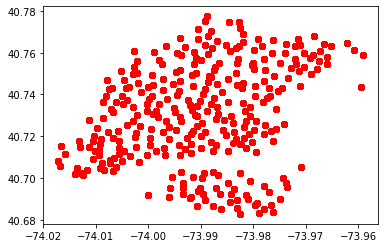

In [23]:
plt.scatter(x,y,color='r')
left_bottom=[(bottom2[0]-left2[0])/8,(bottom2[1]-left2[1])/8]
top_right=[(right2[0]-top2[0])/8,(right2[1]-top2[1])/8]
left_top=[(top2[0]-left2[0])/16,(top2[1]-left2[1])/16]
bottom_right=[(right2[0]-bottom2[0])/16,(right2[1]-bottom2[1])/16]

# for  i in range(9):
#   plt.plot([left2[0]+(left_bottom[0])*i,top2[0]+(top_right[0])*i],[left2[1]+(left_bottom[1])*i,top2[1]+(top_right[1])*i],color='b')
# for i in range(17):
#   plt.plot([left2[0]+(left_top[0])*i,bottom2[0]+(bottom_right[0])*i],[left2[1]+(left_top[1])*i,bottom2[1]+(bottom_right[1])*i],color='b')
plt.show()

In [24]:
result_start_notime.to_csv('D:\\bicycle_data\\2019{}-citibike_grid.csv'.format(str(1).zfill(2)),index=None)

In [30]:
import folium
national_map = folium.Map(location=[40.7337977, -73.99285395], zoom_start=4)

ModuleNotFoundError: No module named 'folium'